<a href="https://colab.research.google.com/github/hoonzi-s/EDRC_Python/blob/main/02.%20Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 선형 회귀

In [50]:
data = np.array([[1, 3],
				[2, 3.2],
				[2.3, 4],
				[3.2, 5],
				[3.3, 5.3],
				[4, 6],
				[4.5, 6.8],
				[4.8, 7.1],
				[4.9, 7.2],
				[6.2, 9.3],
				[7, 10.1],
				[7.1, 10.9],
				[8.8, 14.1],
				[9.5, 16.0],
				[10, 17]])

x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)
print(lr.coef_)
print(lr.intercept_)

[[1.5948928]]
[-0.02390494]


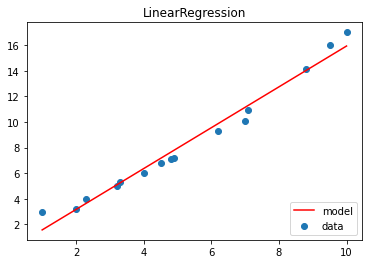

In [57]:
plt.figure()
plt.scatter(x, y, label = 'data')
plt.plot(x, lr.coef_ * x + lr.intercept_, 'r', label = 'model')
plt.title('LinearRegression')
plt.legend(loc = 'lower right')
plt.show()

# 로지스틱 회귀

In [66]:
data = np.array([[1, 0],
		        [2, 0],
		        [3, 0],
		        [4, 0],
		        [5, 1],
		        [6, 1],
		        [7, 1],
		        [8, 1],
		        [9, 1],
		        [10, 1]])
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [75]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x, y)
a = logistic.coef_
b = logistic.intercept_
z = a * x + b
z

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-4.12613444],
       [-2.94505883],
       [-1.76398321],
       [-0.58290759],
       [ 0.59816802],
       [ 1.77924364],
       [ 2.96031926],
       [ 4.14139487],
       [ 5.32247049],
       [ 6.50354611]])

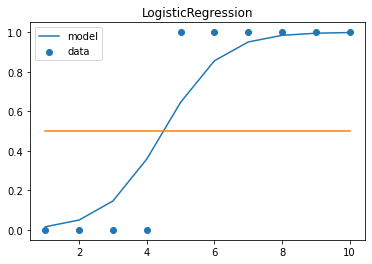

In [87]:
from scipy.special import expit
plt.figure()
plt.scatter(x, y, label = 'data')
plt.plot(x, expit(z), label = 'model')
plt.plot(x, x / x * 0.5)
plt.legend()
plt.title('LogisticRegression')
plt.show()

In [80]:
logistic.score(x, y)

1.0

# Tensorflow

In [88]:
import tensorflow as tf

In [89]:
# 상수 지정
con1 = tf.constant(10)
con2 = tf.constant(20)

In [93]:
# 상수 연산
result1 = tf.add(con1, con2)
result1.numpy()

30

In [94]:
result2 = tf.subtract(con1, con2)
result2.numpy()

-10

In [95]:
result3 = tf.multiply(con1, con2)
result3.numpy()

200

In [96]:
result4 = tf.truediv(con1, con2)
result4.numpy()

0.5

In [101]:
# 상수 행렬 연산
mat1 = tf.constant([[10, 20]], dtype = tf.float32)
mat2 = tf.constant([[30], [40]], dtype = tf.float32)
mat_multiply1 = tf.matmul(mat1, mat2)
mat_multiply2 = tf.matmul(mat2, mat1)
print('Tensorflow 행렬 곱 1: ', mat_multiply1.numpy())
print('Tensorflow 행렬 곱 2: ', mat_multiply2.numpy())

Tensorflow 행렬 곱 1:  [[1100.]]
Tensorflow 행렬 곱 2:  [[300. 600.]
 [400. 800.]]
